In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.plot_helpers import create_animation, imshow
from helpers.computational_tools import remesh, select_LatLon, L1_error, x_coord, y_coord
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-dt', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-layers', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-filters', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-HPF', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-HPF-LPF', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/random-sampled', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/momentum-4-1', additional_subfolder='output', prefix='momentum-4-1')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF', additional_subfolder='output', prefix='HPF')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF-LPF', additional_subfolder='output', prefix='HPF-LPF')

In [3]:
ds.remesh('R64', 'R4')

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4


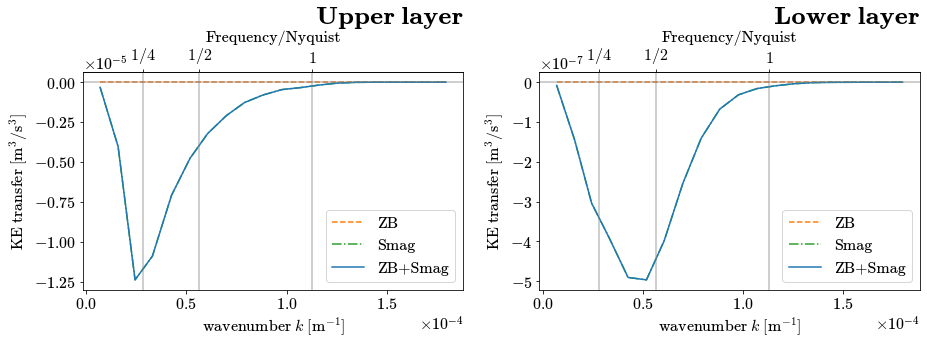

In [87]:
ds.plot_transfer('R4')

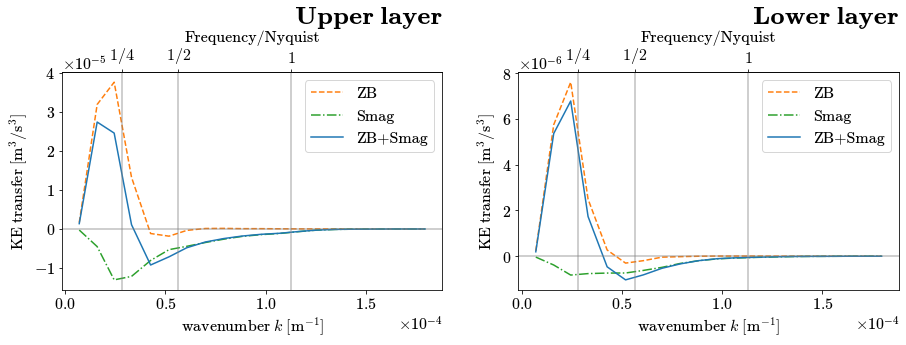

In [88]:
ds.plot_transfer('EXP205')

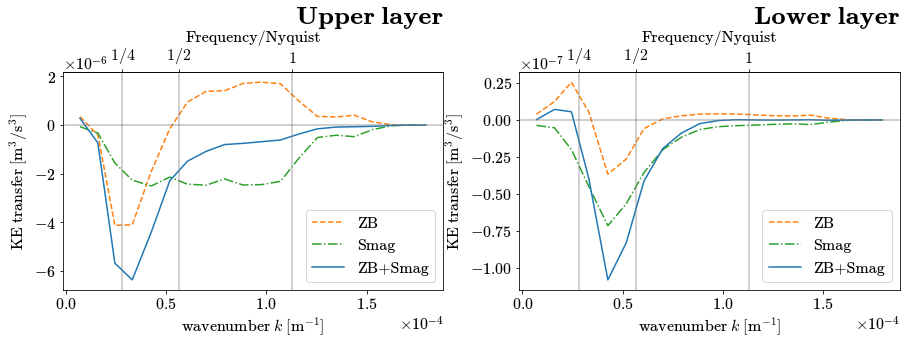

In [91]:
ds.plot_transfer('Cs-0.03-ZB-10-24')

In [ ]:
ds.plot_transfer('Cs-0.03-ZB-10-24-DT-1080')

In [7]:
def plot_KE_PE(ds, exps=['R4', 'R8', 'R64_R4'], labels=['$1/4^o$', '$1/8^o$', '$1/64^o$ \n coarsegrained \n  to $1/4^o$'], color=['k', 'tab:cyan', 'tab:blue', 'tab:red']):
    plt.figure(figsize=(9,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    width = (len(exps)-1) * [0.4] + [1]
    for zl in range(2):
        plt.subplot(2,2,zl+1)
        MKE = []
        EKE = []
        for exp in exps:          
            MKE.append(1e-15*ds[exp].MKE_joul.isel(zl=zl).values)
            EKE.append(1e-15*ds[exp].EKE_joul.isel(zl=zl).values)
        x=np.arange(len(exps));
        x[-1] += 1.5
        plt.bar(x,MKE,width,label='MKE',color=color[0])
        plt.bar(x,EKE,width,bottom=MKE,label='EKE',color=color[1])
        plt.ylabel('Kinetic energy, PJ', fontsize=14);
        plt.xticks(ticks=x,labels=labels);
        if zl==0:
            plt.title('KE, Upper layer')
        else:
            plt.title('KE, Lower layer')
        plt.legend(loc='upper left', fontsize=14)
        plt.ylim([0, (EKE[-1]+MKE[-1])*(1.55-zl/2)])
        
    plt.subplot(2,2,3)
    MPE = []
    EPE = []
    for exp in exps:
        MPE.append(1e-15*ds[exp].MPE_joul.values)
        EPE.append(1e-15*ds[exp].EPE_joul.values)     
    x=np.arange(len(exps));
    x[-1] += 1.5
    plt.bar(x,MPE,width,label='MPE',color=color[2])
    plt.bar(x,EPE,width,bottom=MPE,label='EPE',color=color[3])
    plt.ylabel('Interface displacement \n potential energy, PJ', fontsize=14);
    plt.xticks(ticks=x,labels=labels);
    plt.title('Potential energy')
    plt.legend(loc='upper left', fontsize=14)
    plt.ylim([0, (EPE[-1]+MPE[-1])*1.8])
    plt.axhline(y=MPE[-1], ls=':', color=color[2])
    
    plt.subplot(2,2,4)
    EKE = []
    for exp in exps:          
        EKE.append(1e-15*ds[exp].EKE_joul.values.sum())
    x=np.arange(len(exps));
    x[-1] += 1.5
    plt.bar(x,EKE,width,label='EKE',color=color[1])
    plt.bar(x,EPE,width,bottom=EKE, label='EPE',color=color[3])
    plt.ylabel('Eddy energy, PJ', fontsize=14)
    plt.title('Energy of eddies')
    plt.xticks(ticks=x,labels=labels);
    plt.legend(loc='upper left', fontsize=14)
    plt.ylim([0, (EKE[-1]+EPE[-1])*1.4])


# Smagorinsky

In [26]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky', additional_subfolder='output')

In [7]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'R64_R4',
 'Cs-0.001',
 'Cs-0.002',
 'Cs-0.005',
 'Cs-0.01',
 'Cs-0.02',
 'Cs-0.03',
 'Cs-0.04',
 'Cs-0.05',
 'Cs-0.06',
 'Cs-0.07',
 'Cs-0.08',
 'Cs-0.09',
 'Cs-0.1']

Text(0.5, 0.97, 'Energy decomposition for Smagorinsky model at $1/4^o$')

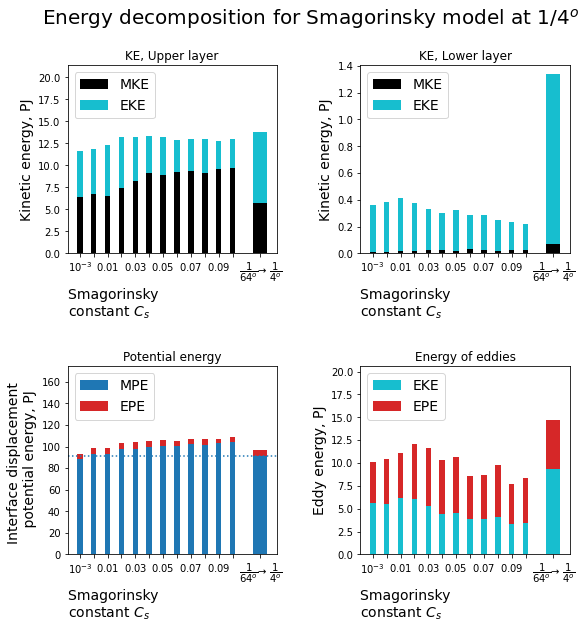

In [8]:
plot_KE_PE(ds, 
           exps = ['Cs-0.001', 'Cs-0.002']+[f'Cs-{i/100}' for i in range(1,11)]+['R64_R4'], 
           labels = ['$10^{-3}$', None]+[f'${i/100}$' if i%2==1 else None for i in range(1,11)]+['$\\dfrac{1}{64^o} \\to$ $\\dfrac{1}{4^o}$'],
           color=['k', 'tab:cyan', 'tab:blue', 'tab:red'] 
          )
for j in range(1,5):
    plt.subplot(2,2,j)
    plt.xlabel('Smagorinsky \nconstant $C_s$', loc='left', fontsize=14)
plt.suptitle('Energy decomposition for Smagorinsky model at $1/4^o$', y=0.97, fontsize=20)
#plt.savefig('KE-APE-Smagorinsky.pdf',bbox_inches='tight')

In [7]:
def error(exp, target='R64_R4'):
    return sum(ds[exp].L1_error(ds[target], features=['MKE_joul', 'EKE_joul', 'MPE_joul', 'EPE_joul'])[0])

In [218]:
for i in range(1,11):
    print(f'Cs={i/100}, error=', error(f'Cs-{i/100}'))

Cs=0.01, error= 2.0029704278058604
Cs=0.02, error= 2.2884986967721987
Cs=0.03, error= 2.544803043631141
Cs=0.04, error= 2.652486491167749
Cs=0.05, error= 2.746871818417147
Cs=0.06, error= 2.738147591803515
Cs=0.07, error= 2.8699968220335843
Cs=0.08, error= 2.8798120257129574
Cs=0.09, error= 3.073965784293409
Cs=0.1, error= 2.9993501428155755


In [8]:
error('Cs-0.005')

2.2418075493235836

In [9]:
error('Cs-0.002')

2.1694234382228474

In [10]:
error('Cs-0.001')

2.2039678948195314

# Smagorinsky-ZB

In [42]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB', additional_subfolder='output')

In [4]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'Cs-0.01-ZB-0-24',
 'Cs-0.01-ZB-1-24',
 'Cs-0.01-ZB-10-24',
 'Cs-0.01-ZB-2-24',
 'Cs-0.01-ZB-3-24',
 'Cs-0.01-ZB-4-24',
 'Cs-0.01-ZB-5-24',
 'Cs-0.01-ZB-6-24',
 'Cs-0.01-ZB-7-24',
 'Cs-0.01-ZB-8-24',
 'Cs-0.01-ZB-9-24',
 'Cs-0.02-ZB-0-24',
 'Cs-0.02-ZB-1-24',
 'Cs-0.02-ZB-10-24',
 'Cs-0.02-ZB-2-24',
 'Cs-0.02-ZB-3-24',
 'Cs-0.02-ZB-4-24',
 'Cs-0.02-ZB-5-24',
 'Cs-0.02-ZB-6-24',
 'Cs-0.02-ZB-7-24',
 'Cs-0.02-ZB-8-24',
 'Cs-0.02-ZB-9-24',
 'Cs-0.03-ZB-0-24',
 'Cs-0.03-ZB-1-24',
 'Cs-0.03-ZB-10-24',
 'Cs-0.03-ZB-2-24',
 'Cs-0.03-ZB-3-24',
 'Cs-0.03-ZB-4-24',
 'Cs-0.03-ZB-5-24',
 'Cs-0.03-ZB-6-24',
 'Cs-0.03-ZB-7-24',
 'Cs-0.03-ZB-8-24',
 'Cs-0.03-ZB-9-24',
 'Cs-0.04-ZB-0-24',
 'Cs-0.04-ZB-1-24',
 'Cs-0.04-ZB-10-24',
 'Cs-0.04-ZB-2-24',
 'Cs-0.04-ZB-3-24',
 'Cs-0.04-ZB-4-24',
 'Cs-0.04-ZB-5-24',
 'Cs-0.04-ZB-6-24',
 'Cs-0.04-ZB-7-24',
 'Cs-0.04-ZB-8-24',
 'Cs-0.04-ZB-9-24',
 'Cs-0.05-ZB-0-24',
 'Cs-0.05-ZB-1-24',
 'Cs-0.05-ZB-10-24',
 'Cs-0.05-

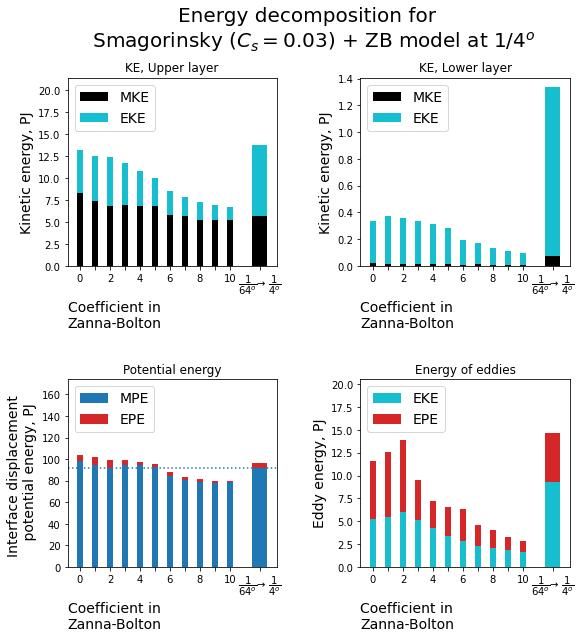

In [11]:
for Cs in [0.03]:
    plot_KE_PE(ds, 
               exps=[f'Cs-{Cs}-ZB-{i}-24' for i in range(11)] +['R64_R4'], 
               labels = [f'{i}' if i%2==0 else None for i in range(11)]+['$\\dfrac{1}{64^o} \\to$ $\\dfrac{1}{4^o}$'],
              )
    for j in range(1,5):
        plt.subplot(2,2,j)
        plt.xlabel('Coefficient in \nZanna-Bolton', loc='left', fontsize=14)
    plt.suptitle(f'Energy decomposition for \n Smagorinsky ($C_s={Cs}$) + ZB model at $1/4^o$', y=0.99, fontsize=20)
    #plt.savefig(f'KE-APE-Smagorinsky-{Cs}-ZB.pdf',bbox_inches='tight')

# Sensitivity to time step

In [26]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-dt', additional_subfolder='output')

In [27]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'R64_R4',
 'EXP111',
 'EXP112',
 'EXP113',
 'EXP114',
 'EXP115',
 'EXP116',
 'EXP117',
 'EXP118',
 'EXP119',
 'EXP120',
 'EXP121',
 'EXP122',
 'EXP123',
 'EXP124',
 'EXP125',
 'EXP126',
 'EXP127',
 'EXP128',
 'EXP129',
 'EXP130',
 'EXP131',
 'EXP132',
 'EXP133',
 'EXP134',
 'EXP135',
 'EXP136',
 'EXP137',
 'EXP138',
 'EXP139',
 'EXP140',
 'EXP141',
 'EXP142',
 'EXP143',
 'EXP144',
 'EXP145',
 'EXP146',
 'EXP147',
 'EXP148',
 'EXP149',
 'EXP150',
 'EXP151',
 'EXP152',
 'EXP153',
 'EXP154',
 'EXP155',
 'EXP156',
 'EXP157',
 'EXP158',
 'EXP159',
 'EXP160',
 'EXP161',
 'EXP162',
 'EXP163',
 'EXP164',
 'EXP165',
 'EXP166',
 'EXP167',
 'EXP168',
 'EXP169',
 'EXP170',
 'EXP171',
 'EXP172',
 'EXP173',
 'EXP174',
 'EXP175',
 'EXP176',
 'EXP177',
 'EXP178',
 'EXP179',
 'EXP180',
 'EXP181',
 'EXP182',
 'EXP183',
 'EXP184',
 'EXP185',
 'EXP186',
 'EXP187',
 'EXP188',
 'EXP189',
 'EXP190',
 'EXP191',
 'EXP192',
 'EXP193',
 'EXP194',
 'EXP195',
 'EXP196'

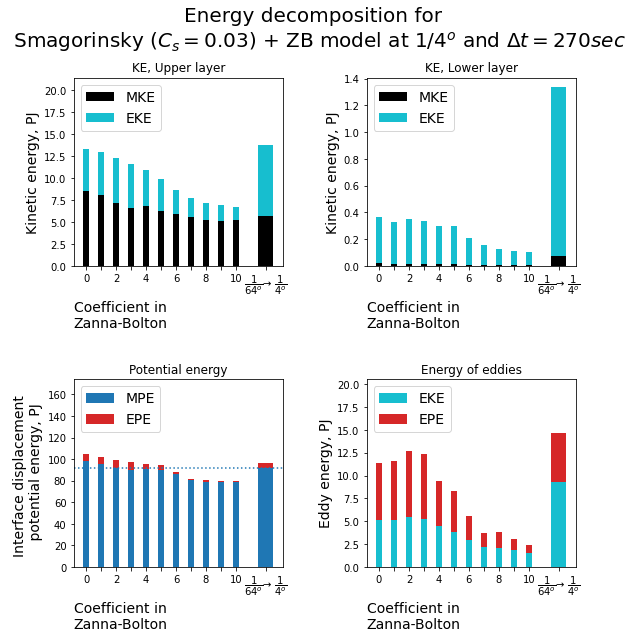

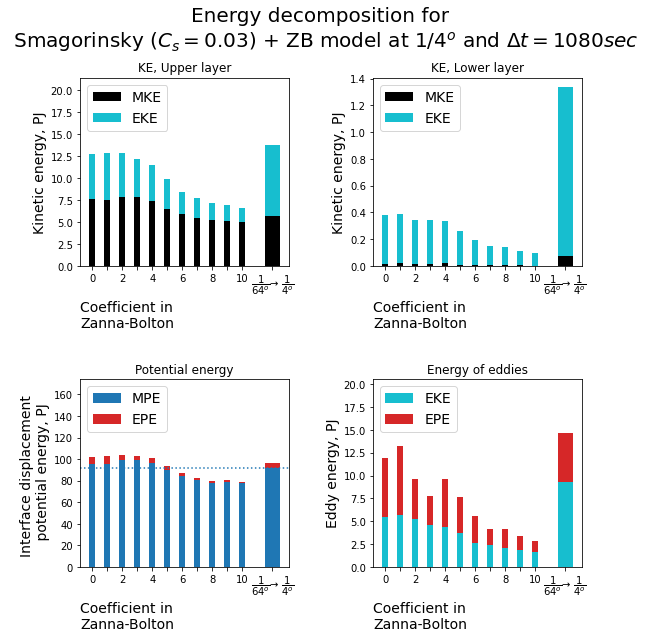

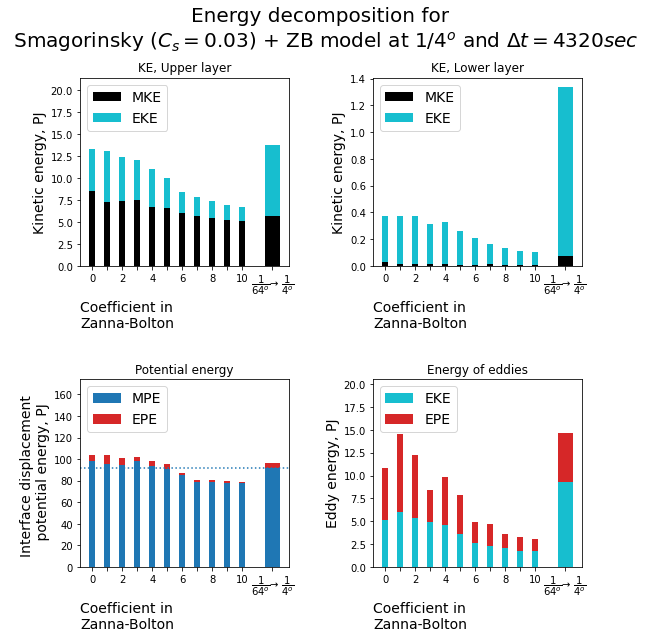

In [16]:
for DT in [270, 1080, 4320]:
    for Cs in [0.03]:
        plot_KE_PE(ds, 
                   exps=[f'Cs-{Cs}-ZB-{i}-24-DT-{DT}' for i in range(11)] +['R64_R4'], 
                   labels = [f'{i}' if i%2==0 else None for i in range(11)]+['$\\dfrac{1}{64^o} \\to$ $\\dfrac{1}{4^o}$'],
                  )
        for j in range(1,5):
            plt.subplot(2,2,j)
            plt.xlabel('Coefficient in \nZanna-Bolton', loc='left', fontsize=14)
        plt.suptitle(f'Energy decomposition for \n Smagorinsky ($C_s={Cs}$) + ZB model at $1/4^o$ and $\Delta t={DT}sec$', y=0.99, fontsize=20)
        plt.savefig(f'KE-APE-Smagorinsky-{Cs}-ZB-{DT}.pdf',bbox_inches='tight')

# Sensitivity to the amplitude in layers

In [37]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-layers', additional_subfolder='output')


In [36]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'R64_R4',
 'stress_iter-1-stress_order-1-upper-0-10-lower-0-10',
 'stress_iter-1-stress_order-1-upper-0-10-lower-10-10',
 'stress_iter-1-stress_order-1-upper-0-10-lower-2-10',
 'stress_iter-1-stress_order-1-upper-0-10-lower-4-10',
 'stress_iter-1-stress_order-1-upper-0-10-lower-6-10',
 'stress_iter-1-stress_order-1-upper-0-10-lower-8-10',
 'stress_iter-1-stress_order-1-upper-10-10-lower-0-10',
 'stress_iter-1-stress_order-1-upper-10-10-lower-10-10',
 'stress_iter-1-stress_order-1-upper-10-10-lower-2-10',
 'stress_iter-1-stress_order-1-upper-10-10-lower-4-10',
 'stress_iter-1-stress_order-1-upper-10-10-lower-6-10',
 'stress_iter-1-stress_order-1-upper-10-10-lower-8-10',
 'stress_iter-1-stress_order-1-upper-2-10-lower-0-10',
 'stress_iter-1-stress_order-1-upper-2-10-lower-10-10',
 'stress_iter-1-stress_order-1-upper-2-10-lower-2-10',
 'stress_iter-1-stress_order-1-upper-2-10-lower-4-10',
 'stress_iter-1-stress_order-1-upper-2-10-lower-6-10',


In [38]:
def metric(ds,exp,target='R64_R4'):
    return sum(ds[exp].L1_error(ds[target], features=['MKE_joul', 'EKE_joul'])[0])/4
    #return ds[exp].L1_error(ds[target], features=['ssh_mean'])[0][0]

In [39]:
def find_minimum(array):
    idx = np.unravel_index(array.argmin(),array.shape)
    y = array.gamma_lower[idx[0]]
    x = array.gamma_upper[idx[1]]
    return float(x), float(y),float(array.min())

In [40]:
error = xr.DataArray(np.zeros((6,6)), dims=['gamma_lower', 'gamma_upper'])
error['gamma_lower'] = [i/24 for i in [0,2,4,6,8,10]]
error['gamma_upper'] = [i/24 for i in [0,2,4,6,8,10]]

In [41]:
for j, gamma_upper in enumerate([0,2,4,6,8,10]):
    for i, gamma_lower in enumerate([0,2,4,6,8,10]):
        error[i,j] = metric(ds, f'upper-{gamma_upper}-24-lower-{gamma_lower}-24')

In [42]:
x,y,error_min = find_minimum(error)
dv = max(error[0,0]-error.min(), error.max() - error[0,0]);
vmin = error[0,0] - dv
vmax = error[0,0] + dv

In [43]:
error = error.interp(gamma_lower=np.linspace(0,10/24,101), gamma_upper=np.linspace(0,10/24,101), method='linear')

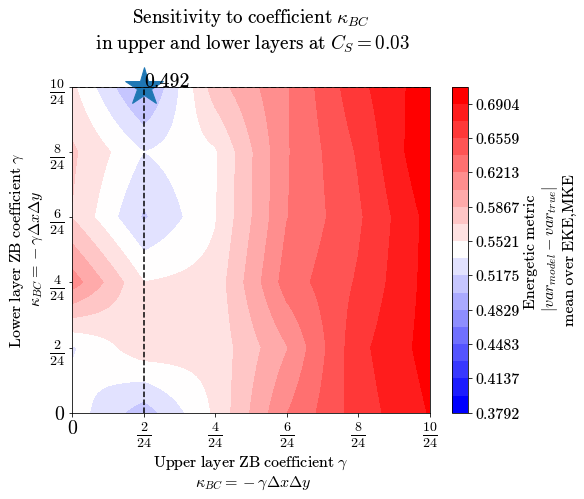

In [45]:
plt.rcParams.update({'font.size': 16})
import matplotlib
matplotlib.rcParams.update({
        'font.family': 'MathJax_Main',
        'mathtext.fontset': 'cm'})
plt.figure(figsize=(8,6))
error.plot.contourf(cmap='bwr',levels=20,vmin=vmin,vmax=vmax,
                    cbar_kwargs=dict(label='Energetic metric \n $|var_{model}-var_{true}|$ \nmean over EKE,MKE'))
                    #cbar_kwargs=dict(label='L1 error in mean ssh'))

plt.plot(x,y,marker='*',markersize=40,clip_on=False)
plt.text(x,y,round(error_min,3),fontsize=20)
plt.axhline(y,ls='--',color='k')
plt.axvline(x,ls='--',color='k')


plt.xticks([0, 2/24, 4/24, 6/24, 8/24, 10/24],
           ['$0$', '$\\frac{2}{24}$', '$\\frac{4}{24}$', '$\\frac{6}{24}$', '$\\frac{8}{24}$', '$\\frac{10}{24}$'], fontsize=20)
plt.yticks([0, 2/24, 4/24, 6/24, 8/24, 10/24],
           ['$0$', '$\\frac{2}{24}$', '$\\frac{4}{24}$', '$\\frac{6}{24}$', '$\\frac{8}{24}$', '$\\frac{10}{24}$'], fontsize=20)
plt.xlabel('Upper layer ZB coefficient $\gamma$ \n $\kappa_{BC}=-\gamma \Delta x\Delta y$')
plt.ylabel('Lower layer ZB coefficient $\gamma$ \n $\kappa_{BC}=-\gamma \Delta x\Delta y$')
plt.title('Sensitivity to coefficient $\kappa_{BC}$ \n in upper and lower layers at $C_S=0.03$', y=1.1)
plt.savefig(f'upper-lower.pdf',bbox_inches='tight')

# Sensitivity to the amplitude in layers with momentum filter

In [4]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-filters', additional_subfolder='output')


In [78]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'R64_R4',
 'upper-0-24-lower-0-24',
 'upper-0-24-lower-10-24',
 'upper-0-24-lower-2-24',
 'upper-0-24-lower-4-24',
 'upper-0-24-lower-6-24',
 'upper-0-24-lower-8-24',
 'upper-10-24-lower-0-24',
 'upper-10-24-lower-10-24',
 'upper-10-24-lower-2-24',
 'upper-10-24-lower-4-24',
 'upper-10-24-lower-6-24',
 'upper-10-24-lower-8-24',
 'upper-2-24-lower-0-24',
 'upper-2-24-lower-10-24',
 'upper-2-24-lower-2-24',
 'upper-2-24-lower-4-24',
 'upper-2-24-lower-6-24',
 'upper-2-24-lower-8-24',
 'upper-4-24-lower-0-24',
 'upper-4-24-lower-10-24',
 'upper-4-24-lower-2-24',
 'upper-4-24-lower-4-24',
 'upper-4-24-lower-6-24',
 'upper-4-24-lower-8-24',
 'upper-6-24-lower-0-24',
 'upper-6-24-lower-10-24',
 'upper-6-24-lower-2-24',
 'upper-6-24-lower-4-24',
 'upper-6-24-lower-6-24',
 'upper-6-24-lower-8-24',
 'upper-8-24-lower-0-24',
 'upper-8-24-lower-10-24',
 'upper-8-24-lower-2-24',
 'upper-8-24-lower-4-24',
 'upper-8-24-lower-6-24',
 'upper-8-24-lower-8-2

In [33]:
def metric(ds,exp,target='R64_R4'):
    return sum(ds[exp].L1_error(ds[target], features=['MKE_joul', 'EKE_joul'])[0])/4
    #return ds[exp].L1_error(ds[target], features=['ssh_mean'])[0][0]

In [34]:
def compute_error(stress_iter=4, stress_order=4):
    error = xr.DataArray(np.zeros((6,6)), dims=['gamma_lower', 'gamma_upper'])
    error['gamma_lower'] = [i/10 for i in [0,2,4,6,8,10]]
    error['gamma_upper'] = [i/10 for i in [0,2,4,6,8,10]]
    for j, gamma_upper in enumerate([0,2,4,6,8,10]):
        for i, gamma_lower in enumerate([0,2,4,6,8,10]):
            error[i,j] = metric(ds, f'stress_iter-{stress_iter}-stress_order-{stress_order}-upper-{gamma_upper}-10-lower-{gamma_lower}-10')
    x,y,error_min = find_minimum(error)
    error = error.interp(gamma_lower=np.linspace(0,10/10,100), gamma_upper=np.linspace(0,10/10,100), method='linear')
    return error,x,y,error_min

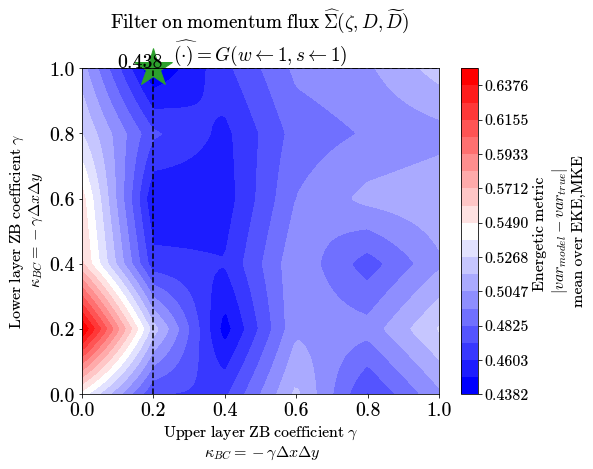

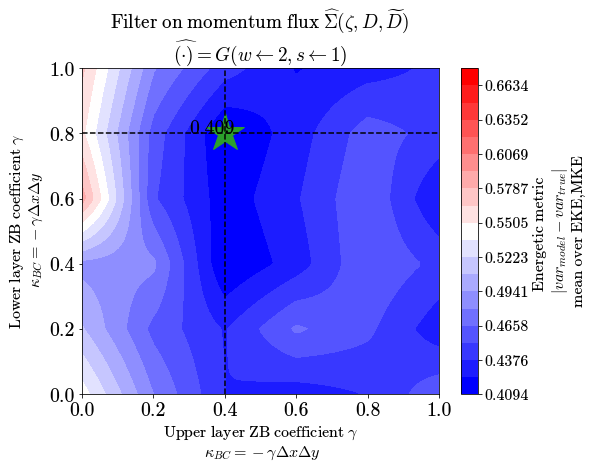

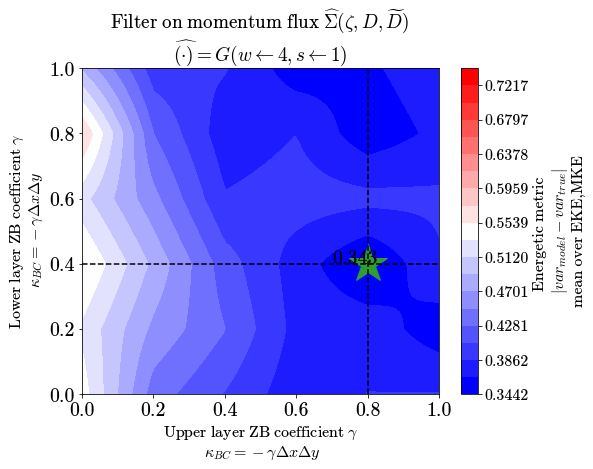

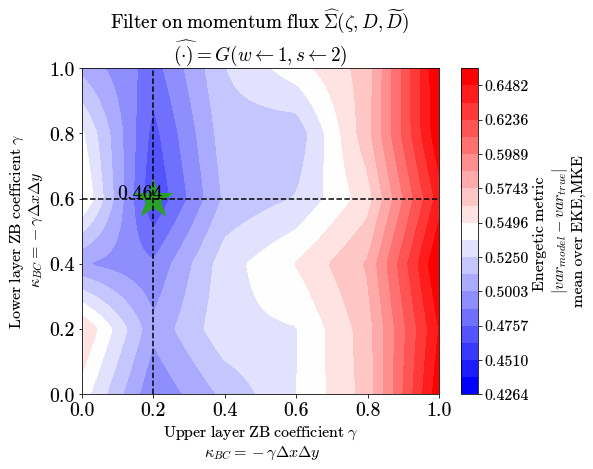

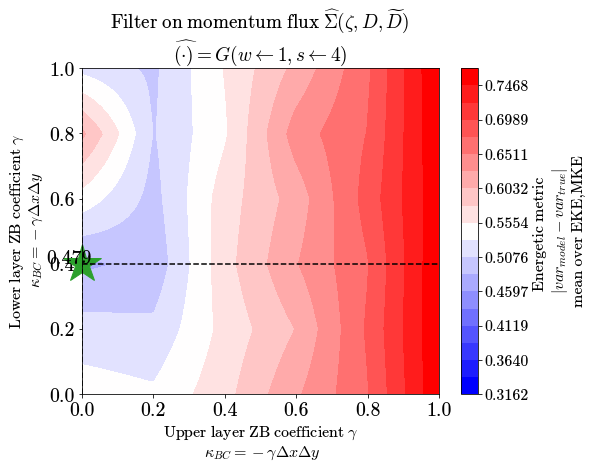

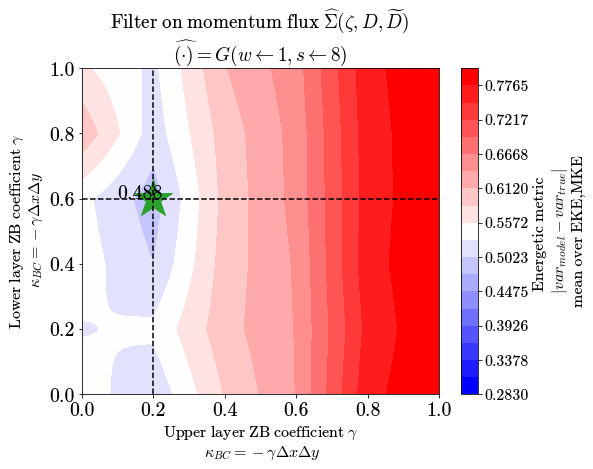

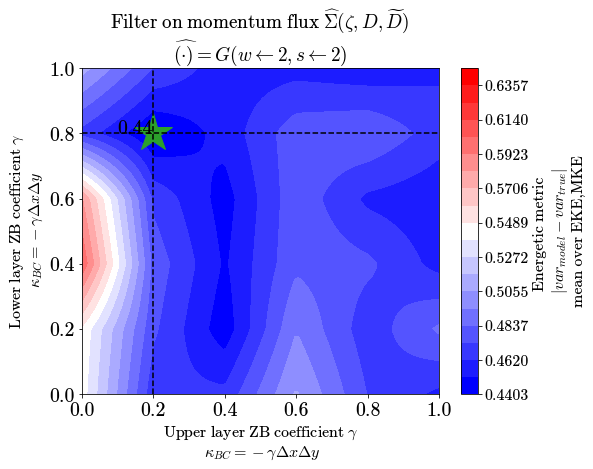

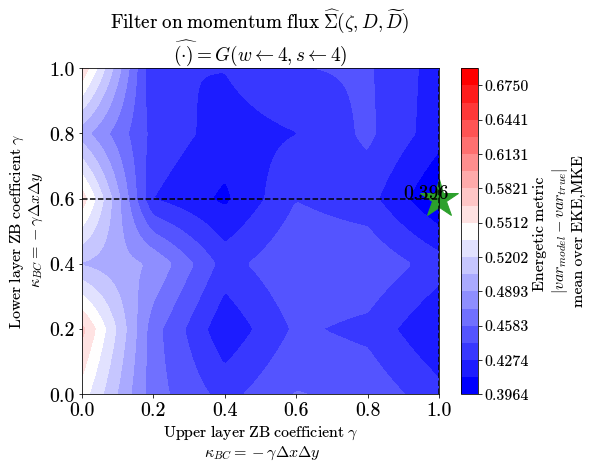

In [35]:
import matplotlib
matplotlib.rcParams.update({
        'font.family': 'MathJax_Main',
        'mathtext.fontset': 'cm'})

for stress_iter, stress_order in [(1,1), (2,1), (4,1), (1,2), (1,4), (1,8), (2,2), (4,4)]:
    error,x,y,error_min = compute_error(stress_iter=stress_iter,stress_order=stress_order)
    
    dv = max(error[0,0]-error.min(), error.max() - error[0,0]);
    vmin = error[0,0] - dv
    vmax = error[0,0] + dv

    plt.rcParams.update({'font.size': 16})
    plt.figure(figsize=(8,6))
    error.plot.contourf(cmap='bwr',levels=20,vmin=vmin,vmax=vmax,
                        cbar_kwargs=dict(label='Energetic metric \n $|var_{model}-var_{true}|$ \nmean over EKE,MKE'))
                        #cbar_kwargs=dict(label='L1 error in mean ssh'))

    plt.plot(x,y,marker='*',color='tab:green',markersize=40,clip_on=False)
    plt.text(x-0.1,y,round(error_min,3),fontsize=20)
    plt.axhline(y,ls='--',color='k')
    plt.axvline(x,ls='--',color='k')
        
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1],fontsize=20)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1],fontsize=20)
    plt.xlabel('Upper layer ZB coefficient $\gamma$ \n $\kappa_{BC}=-\gamma \Delta x\Delta y$')
    plt.ylabel('Lower layer ZB coefficient $\gamma$ \n $\kappa_{BC}=-\gamma \Delta x\Delta y$')
    plt.title('Filter on momentum flux $\widehat{\mathbf{\Sigma}}(\zeta,D,\widetilde{D})$ \n' + '$\widehat{(\cdot)}='+f'G(w\\leftarrow{stress_iter},s\\leftarrow{stress_order})$')
    plt.savefig(f'momentum-filter-width-{stress_iter}-sel-{stress_order}.pdf',bbox_inches='tight')

# Best experiment is not wow

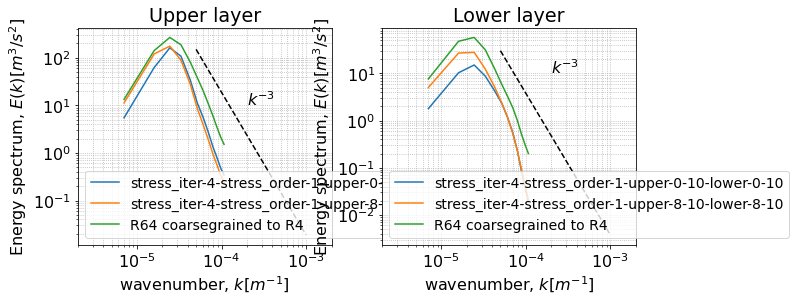

In [149]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['stress_iter-4-stress_order-1-upper-0-10-lower-0-10','stress_iter-4-stress_order-1-upper-8-10-lower-8-10', 'R64_R4'],ax=ax)

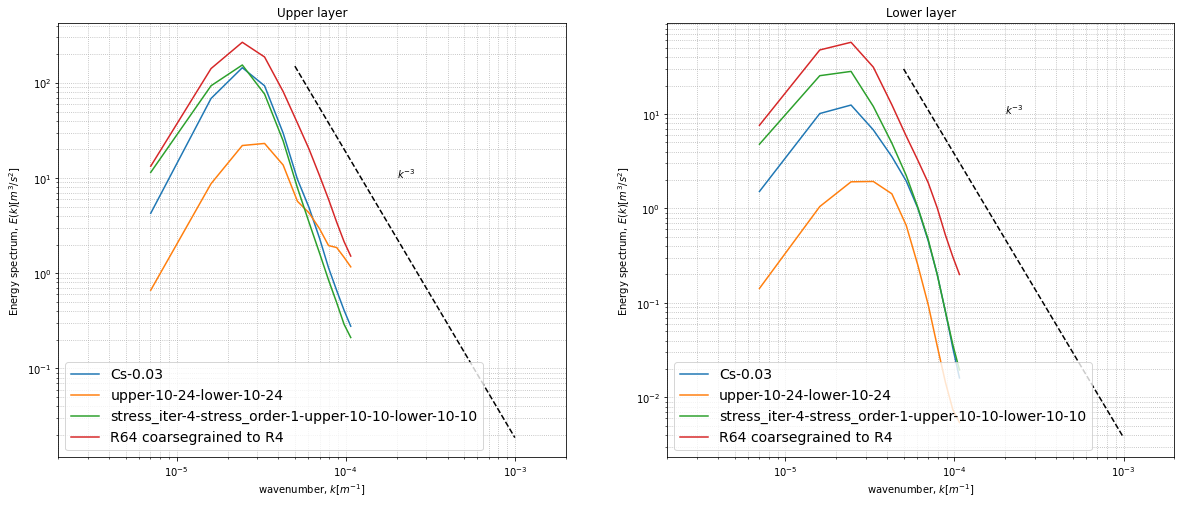

In [68]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['Cs-0.03','upper-10-24-lower-10-24','stress_iter-4-stress_order-1-upper-10-10-lower-10-10', 'R64_R4'],ax=ax)



In [70]:
np.linspace(0,10,41)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

# HPF experiment

In [10]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-HPF', additional_subfolder='output')


In [151]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'R64_R4',
 'upper-0-24-lower-0-24',
 'upper-0-24-lower-10-24',
 'upper-0-24-lower-2-24',
 'upper-0-24-lower-4-24',
 'upper-0-24-lower-6-24',
 'upper-0-24-lower-8-24',
 'upper-10-24-lower-0-24',
 'upper-10-24-lower-10-24',
 'upper-10-24-lower-2-24',
 'upper-10-24-lower-4-24',
 'upper-10-24-lower-6-24',
 'upper-10-24-lower-8-24',
 'upper-2-24-lower-0-24',
 'upper-2-24-lower-10-24',
 'upper-2-24-lower-2-24',
 'upper-2-24-lower-4-24',
 'upper-2-24-lower-6-24',
 'upper-2-24-lower-8-24',
 'upper-4-24-lower-0-24',
 'upper-4-24-lower-10-24',
 'upper-4-24-lower-2-24',
 'upper-4-24-lower-4-24',
 'upper-4-24-lower-6-24',
 'upper-4-24-lower-8-24',
 'upper-6-24-lower-0-24',
 'upper-6-24-lower-10-24',
 'upper-6-24-lower-2-24',
 'upper-6-24-lower-4-24',
 'upper-6-24-lower-6-24',
 'upper-6-24-lower-8-24',
 'upper-8-24-lower-0-24',
 'upper-8-24-lower-10-24',
 'upper-8-24-lower-2-24',
 'upper-8-24-lower-4-24',
 'upper-8-24-lower-6-24',
 'upper-8-24-lower-8-2

In [39]:
def metric(ds,exp,target='R64_R4'):
    return sum(ds[exp].L1_error(ds[target], features=['MKE_joul', 'EKE_joul'])[0])/4
    #return ds[exp].L1_error(ds[target], features=['ssh_mean'])[0][0]

In [155]:
def compute_error():
    error = xr.DataArray(np.zeros((6,6)), dims=['gamma_lower', 'gamma_upper'])
    error['gamma_lower'] = [i/5 for i in [0,2,4,6,8,10]]
    error['gamma_upper'] = [i/5 for i in [0,2,4,6,8,10]]
    for j, gamma_upper in enumerate([0,2,4,6,8,10]):
        for i, gamma_lower in enumerate([0,2,4,6,8,10]):
            error[i,j] = metric(ds, f'upper-{gamma_upper}-5-lower-{gamma_lower}-5')
    x,y,error_min = find_minimum(error)
    error = error.interp(gamma_lower=np.linspace(0,10/5,100), gamma_upper=np.linspace(0,10/5,100), method='linear')
    return error,x,y,error_min

In [157]:
error,x,y,error_min = compute_error()

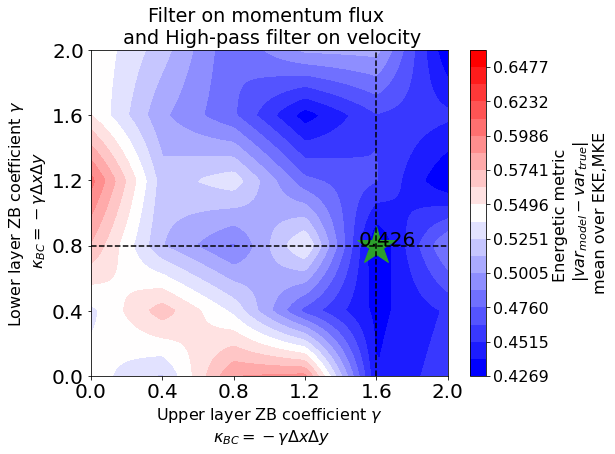

In [159]:
dv = max(error[0,0]-error.min(), error.max() - error[0,0]);
vmin = error[0,0] - dv
vmax = error[0,0] + dv

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,6))
error.plot.contourf(cmap='bwr',levels=20,vmin=vmin,vmax=vmax,
                    cbar_kwargs=dict(label='Energetic metric \n $|var_{model}-var_{true}|$ \nmean over EKE,MKE'))
                    #cbar_kwargs=dict(label='L1 error in mean ssh'))

plt.plot(x,y,marker='*',color='tab:green',markersize=40,clip_on=False)
plt.text(x-0.1,y,round(error_min,3),fontsize=20)
plt.axhline(y,ls='--',color='k')
plt.axvline(x,ls='--',color='k')

plt.xticks([0, 0.4, 0.8, 1.2, 1.6, 2],fontsize=20)
plt.yticks([0, 0.4, 0.8, 1.2, 1.6, 2],fontsize=20)
plt.xlabel('Upper layer ZB coefficient $\gamma$ \n $\kappa_{BC}=-\gamma \Delta x\Delta y$')
plt.ylabel('Lower layer ZB coefficient $\gamma$ \n $\kappa_{BC}=-\gamma \Delta x\Delta y$')
plt.title(f'Filter on momentum flux \n and High-pass filter on velocity')
plt.savefig(f'HPF-filter.pdf',bbox_inches='tight')

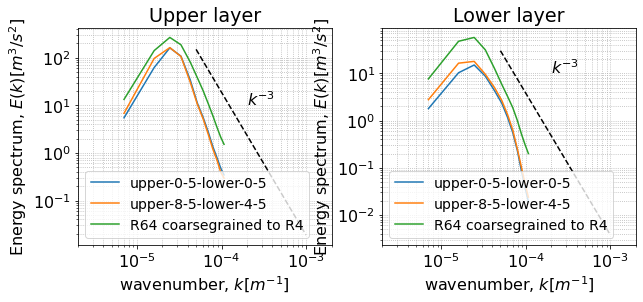

In [166]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['upper-0-5-lower-0-5','upper-8-5-lower-4-5', 'R64_R4'],ax=ax)



# HPF-LPF

In [11]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-HPF-LPF', additional_subfolder='output')


In [161]:
def compute_error():
    error = xr.DataArray(np.zeros((6,6)), dims=['gamma_lower', 'gamma_upper'])
    error['gamma_lower'] = [i/3 for i in [0,2,4,6,8,10]]
    error['gamma_upper'] = [i/3 for i in [0,2,4,6,8,10]]
    for j, gamma_upper in enumerate([0,2,4,6,8,10]):
        for i, gamma_lower in enumerate([0,2,4,6,8,10]):
            error[i,j] = metric(ds, f'upper-{gamma_upper}-3-lower-{gamma_lower}-3')
    x,y,error_min = find_minimum(error)
    error = error.interp(gamma_lower=np.linspace(0,10/3,100), gamma_upper=np.linspace(0,10/3,100), method='linear')
    return error,x,y,error_min

In [162]:
error,x,y,error_min = compute_error()

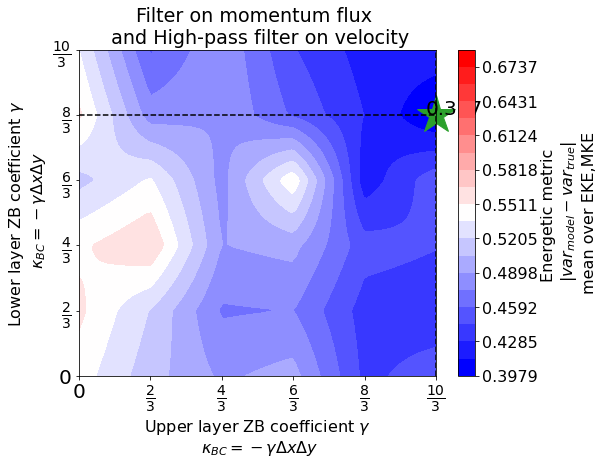

In [164]:
dv = max(error[0,0]-error.min(), error.max() - error[0,0]);
vmin = error[0,0] - dv
vmax = error[0,0] + dv

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,6))
error.plot.contourf(cmap='bwr',levels=20,vmin=vmin,vmax=vmax,
                    cbar_kwargs=dict(label='Energetic metric \n $|var_{model}-var_{true}|$ \nmean over EKE,MKE'))
                    #cbar_kwargs=dict(label='L1 error in mean ssh'))

plt.plot(x,y,marker='*',color='tab:green',markersize=40,clip_on=False)
plt.text(x-0.1,y,round(error_min,3),fontsize=20)
plt.axhline(y,ls='--',color='k')
plt.axvline(x,ls='--',color='k')

plt.xticks([0, 2/3, 4/3, 6/3, 8/3, 10/3],
           ['$0$', '$\\frac{2}{3}$', '$\\frac{4}{3}$', '$\\frac{6}{3}$', '$\\frac{8}{3}$', '$\\frac{10}{3}$'], fontsize=20)
plt.yticks([0, 2/3, 4/3, 6/3, 8/3, 10/3],
           ['$0$', '$\\frac{2}{3}$', '$\\frac{4}{3}$', '$\\frac{6}{3}$', '$\\frac{8}{3}$', '$\\frac{10}{3}$'], fontsize=20)

plt.xlabel('Upper layer ZB coefficient $\gamma$ \n $\kappa_{BC}=-\gamma \Delta x\Delta y$')
plt.ylabel('Lower layer ZB coefficient $\gamma$ \n $\kappa_{BC}=-\gamma \Delta x\Delta y$')
plt.title(f'Filter on momentum flux \n and High-pass filter on velocity')
plt.savefig(f'HPF-LPF-filter.pdf',bbox_inches='tight')

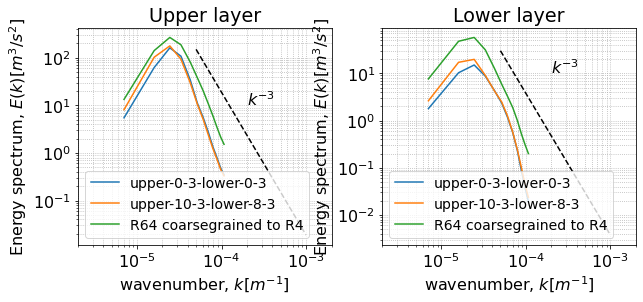

In [167]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['upper-0-3-lower-0-3','upper-10-3-lower-8-3', 'R64_R4'],ax=ax)



# Compare to best random sampled experiment

In [13]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/random-sampled', additional_subfolder='output')


In [12]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'R64_R4',
 'EXP111',
 'EXP112',
 'EXP113',
 'EXP114',
 'EXP115',
 'EXP116',
 'EXP117',
 'EXP118',
 'EXP119',
 'EXP120',
 'EXP121',
 'EXP122',
 'EXP123',
 'EXP124',
 'EXP125',
 'EXP126',
 'EXP127',
 'EXP128',
 'EXP129',
 'EXP130',
 'EXP131',
 'EXP132',
 'EXP133',
 'EXP134',
 'EXP135',
 'EXP136',
 'EXP137',
 'EXP138',
 'EXP139',
 'EXP140',
 'EXP141',
 'EXP142',
 'EXP143',
 'EXP144',
 'EXP145',
 'EXP146',
 'EXP147',
 'EXP148',
 'EXP149',
 'EXP150',
 'EXP151',
 'EXP152',
 'EXP153',
 'EXP154',
 'EXP155',
 'EXP156',
 'EXP157',
 'EXP158',
 'EXP159',
 'EXP160',
 'EXP161',
 'EXP162',
 'EXP163',
 'EXP164',
 'EXP165',
 'EXP166',
 'EXP167',
 'EXP168',
 'EXP169',
 'EXP170',
 'EXP171',
 'EXP172',
 'EXP173',
 'EXP174',
 'EXP175',
 'EXP176',
 'EXP177',
 'EXP178',
 'EXP179',
 'EXP180',
 'EXP181',
 'EXP182',
 'EXP183',
 'EXP184',
 'EXP185',
 'EXP186',
 'EXP187',
 'EXP188',
 'EXP189',
 'EXP190',
 'EXP191',
 'EXP192',
 'EXP193',
 'EXP194',
 'EXP195',
 'EXP196'

# Experiments changed :(

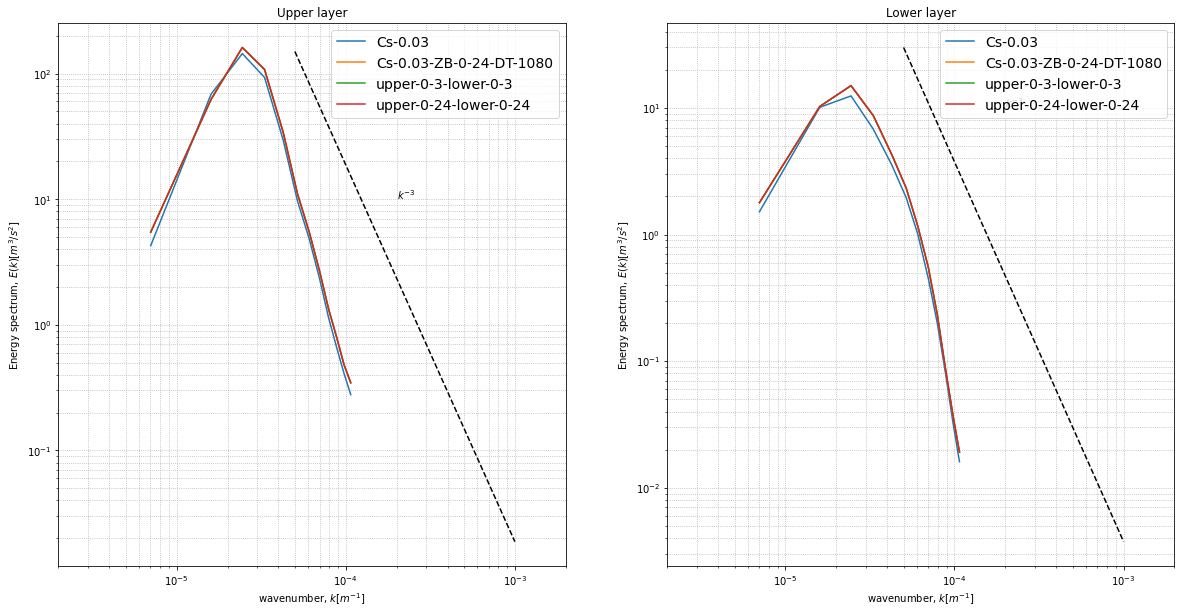

In [33]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['Cs-0.03','Cs-0.03-ZB-0-24-DT-1080', 'upper-0-3-lower-0-3', 'upper-0-24-lower-0-24'],ax=ax)



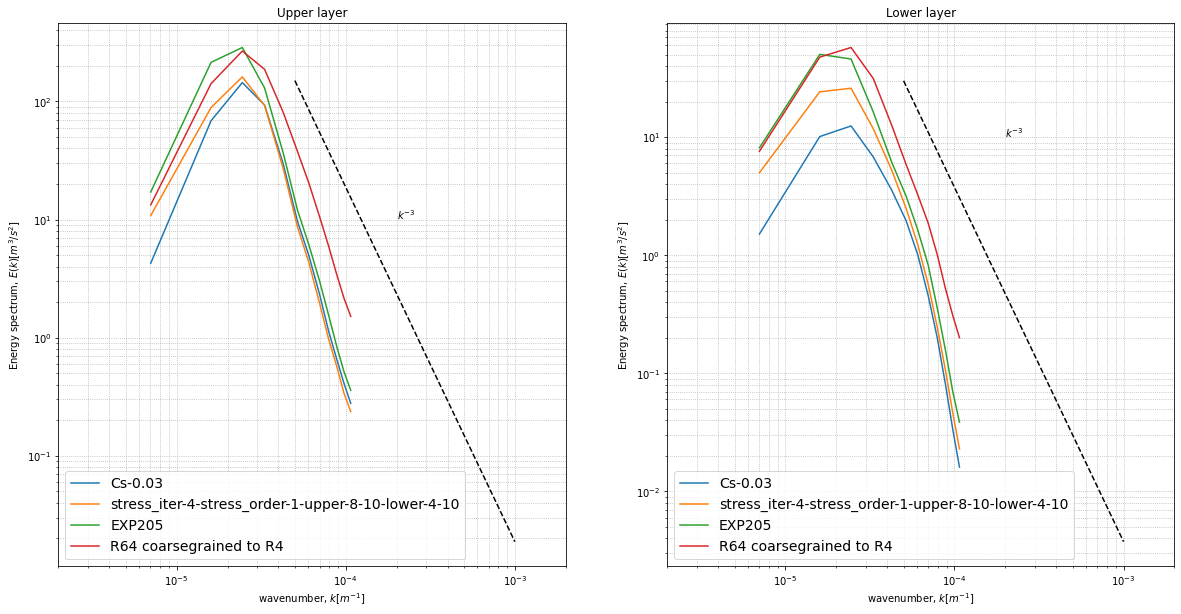

In [45]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['Cs-0.03', 'stress_iter-4-stress_order-1-upper-8-10-lower-4-10', 'EXP205','R64_R4'],ax=ax)

# 1D experiments

In [4]:
# import os
# import json
# for j in range(41):
#     amp = 0
#     with open(f'/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF-LPF/EXP{j}/args.json') as f:
#         d = json.load(f)
#         amp = d['amplitude']
#     print(amp)
#     os.system(f'mv /scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF-LPF/EXP{j} /scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF-LPF/amplitude-{amp}')

In [5]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/momentum-4-1', additional_subfolder='output', prefix='momentum-4-1')



In [10]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'R64_R4',
 'momentum-4-1-amplitude-0.0',
 'momentum-4-1-amplitude-0.25',
 'momentum-4-1-amplitude-0.5',
 'momentum-4-1-amplitude-0.75',
 'momentum-4-1-amplitude-1.0',
 'momentum-4-1-amplitude-1.25',
 'momentum-4-1-amplitude-1.5',
 'momentum-4-1-amplitude-1.75',
 'momentum-4-1-amplitude-10.0',
 'momentum-4-1-amplitude-2.0',
 'momentum-4-1-amplitude-2.25',
 'momentum-4-1-amplitude-2.5',
 'momentum-4-1-amplitude-2.75',
 'momentum-4-1-amplitude-3.0',
 'momentum-4-1-amplitude-3.25',
 'momentum-4-1-amplitude-3.5',
 'momentum-4-1-amplitude-3.75',
 'momentum-4-1-amplitude-4.0',
 'momentum-4-1-amplitude-4.25',
 'momentum-4-1-amplitude-4.5',
 'momentum-4-1-amplitude-4.75',
 'momentum-4-1-amplitude-5.0',
 'momentum-4-1-amplitude-5.25',
 'momentum-4-1-amplitude-5.5',
 'momentum-4-1-amplitude-5.75',
 'momentum-4-1-amplitude-6.0',
 'momentum-4-1-amplitude-6.25',
 'momentum-4-1-amplitude-6.5',
 'momentum-4-1-amplitude-6.75',
 'momentum-4-1-amplitude-7.0',

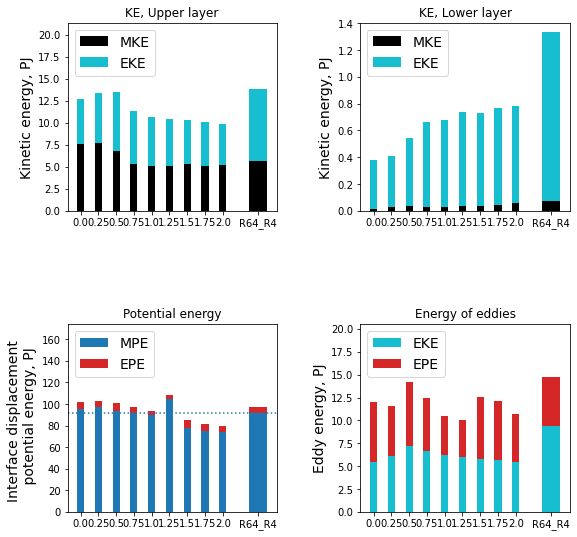

In [21]:
plot_KE_PE(ds, exps=[f'momentum-4-1-amplitude-{amp}' for amp in [0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0]]
           +['R64_R4'], labels=[0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,'R64_R4'])


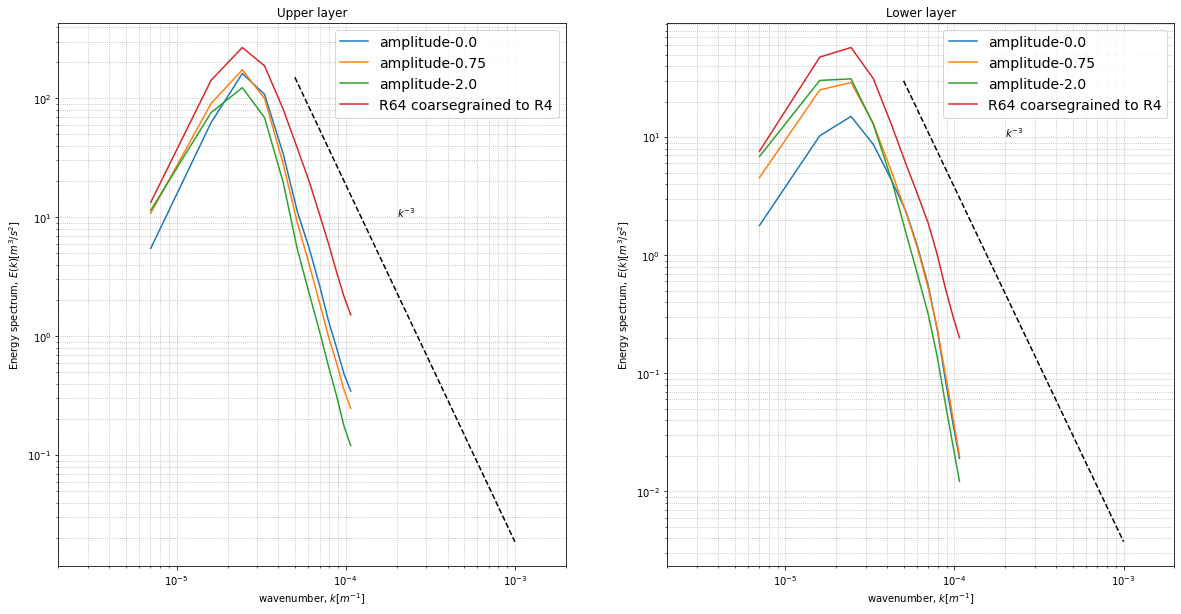

In [32]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['momentum-4-1-amplitude-0.0', 'momentum-4-1-amplitude-0.75', 'momentum-4-1-amplitude-2.0','R64_R4'],ax=ax)



# High-pass-filter on velocity

In [34]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF', additional_subfolder='output', prefix='HPF')

In [36]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'R64_R4',
 'momentum-4-1-amplitude-0.0',
 'momentum-4-1-amplitude-0.25',
 'momentum-4-1-amplitude-0.5',
 'momentum-4-1-amplitude-0.75',
 'momentum-4-1-amplitude-1.0',
 'momentum-4-1-amplitude-1.25',
 'momentum-4-1-amplitude-1.5',
 'momentum-4-1-amplitude-1.75',
 'momentum-4-1-amplitude-10.0',
 'momentum-4-1-amplitude-2.0',
 'momentum-4-1-amplitude-2.25',
 'momentum-4-1-amplitude-2.5',
 'momentum-4-1-amplitude-2.75',
 'momentum-4-1-amplitude-3.0',
 'momentum-4-1-amplitude-3.25',
 'momentum-4-1-amplitude-3.5',
 'momentum-4-1-amplitude-3.75',
 'momentum-4-1-amplitude-4.0',
 'momentum-4-1-amplitude-4.25',
 'momentum-4-1-amplitude-4.5',
 'momentum-4-1-amplitude-4.75',
 'momentum-4-1-amplitude-5.0',
 'momentum-4-1-amplitude-5.25',
 'momentum-4-1-amplitude-5.5',
 'momentum-4-1-amplitude-5.75',
 'momentum-4-1-amplitude-6.0',
 'momentum-4-1-amplitude-6.25',
 'momentum-4-1-amplitude-6.5',
 'momentum-4-1-amplitude-6.75',
 'momentum-4-1-amplitude-7.0',

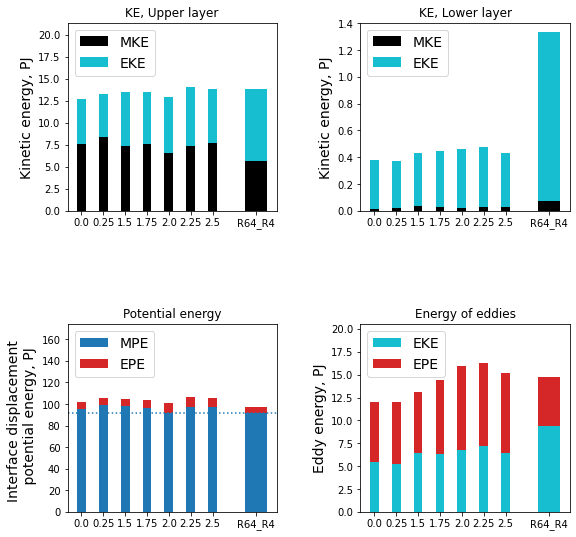

In [53]:
amps = [0.0,0.25,1.5, 1.75, 2.0, 2.25, 2.5];
plot_KE_PE(ds, exps=[f'HPF-amplitude-{amp}' for amp in amps]
           +['R64_R4'], labels=amps+['R64_R4'])


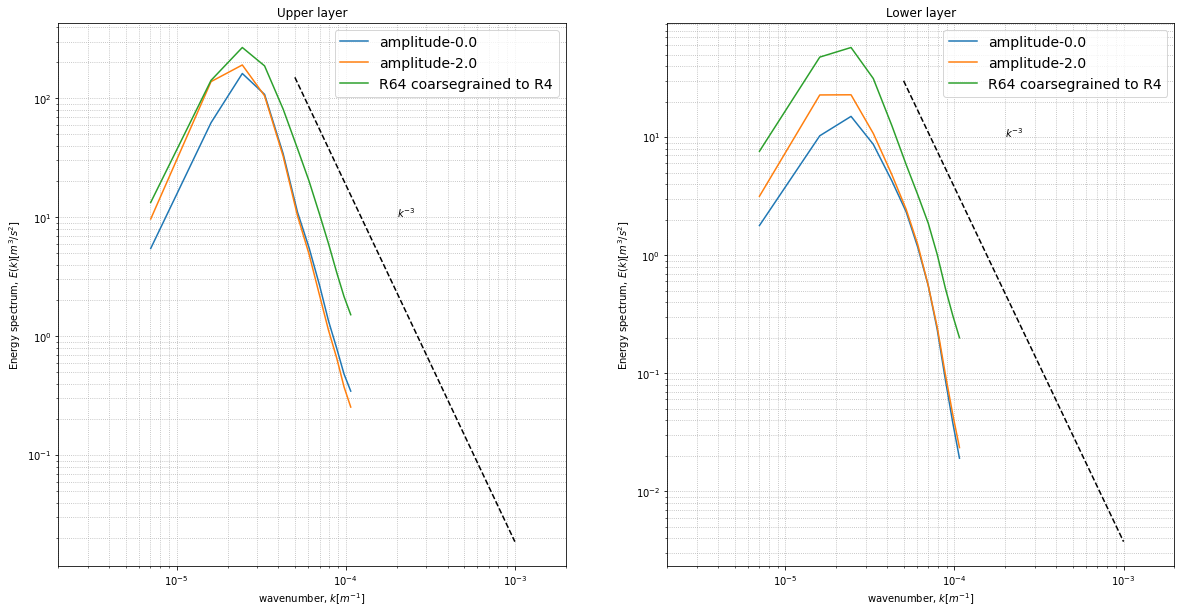

In [69]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['HPF-amplitude-0.0', 'HPF-amplitude-2.0', 'R64_R4'],ax=ax)

# Band-pass filter on velocity

In [52]:
#ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF-LPF', additional_subfolder='output', prefix='HPF-LPF')


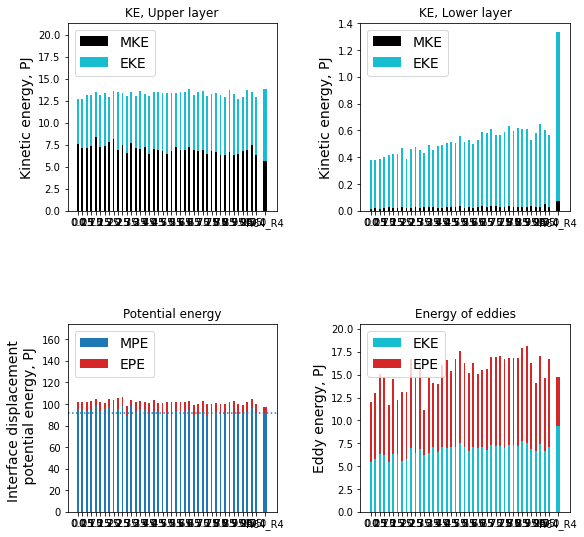

In [64]:
amps = [amp/4 for amp in range(41)];
plot_KE_PE(ds, exps=[f'HPF-LPF-amplitude-{amp}' for amp in amps]
           +['R64_R4'], labels=amps+['R64_R4'])


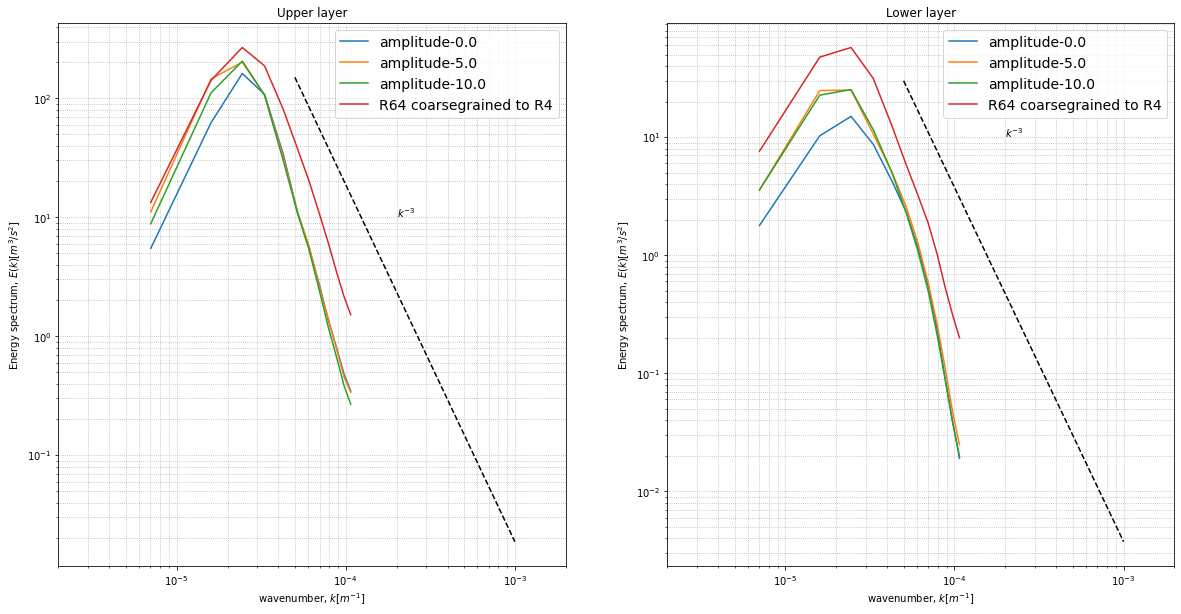

In [72]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ds.plot_KE_spectrum(key='EKE_spectrum', exps=['HPF-LPF-amplitude-0.0', 'HPF-LPF-amplitude-5.0', 'HPF-LPF-amplitude-10.0', 'R64_R4'],ax=ax)